<a href="https://colab.research.google.com/github/benamaranermine/predict-live-birth-occurrence-before-in-vitro-fertilization-treatment/blob/main/predict_live%E2%80%91birth_occurrence_before_in%E2%80%91vitro_fertilization_treatment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # filter the warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import numpy as np
from numpy import genfromtxt
import csv
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC, LinearSVC
from google.colab import drive



In [ ]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/ar-2015-2016-xlsb.xlsx'
data = pd.read_excel(file_path)

In [ ]:
data

,Patient Age at Treatment,Date patient started trying to become pregnant OR date of last pregnancy,"Total Number of Previous cycles, Both IVF and DI","Total Number of Previous treatments, Both IVF and DI at clinic",Total Number of Previous IVF cycles,Total Number of Previous DI cycles,"Total number of previous pregnancies, Both IVF and DI",Total number of IVF pregnancies,Total number of DI pregnancies,Total number of live births - conceived through IVF or DI,...,Heart Three Birth Weight,Heart Three Sex,Heart Three Delivery Date,Heart Three Birth Congenital Abnormalities,Heart Four Weeks Gestation,Heart Four Birth Outcome,Heart Four Birth Weight,Heart Four Sex,Heart Four Delivery Date,Heart Four Birth Congenital Abnormalities
0,40-42,NaN,2,2,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45-50,NaN,3,3,3,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35-37,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18 - 34,NaN,2,2,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18 - 34,NaN,5,5,5,0,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,35-37,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65531,18 - 34,NaN,1,1,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65532,35-37,NaN,3,3,3,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65533,18 - 34,NaN,1,1,1,0,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for col in data:
    print(f"{col} has : {data[col].unique()} unique values\n")

Patient Age at Treatment has : ['40-42' '45-50' '35-37' '18 - 34' '43-44' '38-39' '999'] unique values

Date patient started trying to become pregnant OR date of last pregnancy has : [nan 13. 11. 10. 15. 16. 17. 14. 19. 12. 18. 20.  6.  9.  5.  8.  3.] unique values

Total Number of Previous cycles, Both IVF and DI has : ['2' '3' '0' '5' '>=5' '1' '4'] unique values

Total Number of Previous treatments, Both IVF and DI at clinic has : ['2' '3' '0' '5' '1' '>=5' '4'] unique values

Total Number of Previous IVF cycles has : ['2' '3' '0' '5' '4' '1' '>=5'] unique values

Total Number of Previous DI cycles has : ['0' '3' '>=5' '1' '2' '4' '5'] unique values

Total number of previous pregnancies, Both IVF and DI has : ['0' '1' '2' '4' '3' '5' '>=5'] unique values

Total number of IVF pregnancies has : ['0' '1' '2' '4' '3' '5' '>=5'] unique values

Total number of DI pregnancies has : [0 1 3 2 4] unique values

Total number of live births - conceived through IVF or DI has : [0 1 2 3 5 4] uni

In [ ]:
selected_features = [
    "Patient Age at Treatment",
    "Total Number of Previous IVF cycles",
    "Total number of IVF pregnancies",
    "Total number of live births - conceived through IVF",
    "Type of Infertility - Female Primary",
    "Type of Infertility - Female Secondary",
    "Type of Infertility - Male Primary",
    "Type of Infertility - Male Secondary",
    "Type of Infertility -Couple Primary",
    "Type of Infertility -Couple Secondary",
    "Cause  of Infertility - Tubal disease",
    "Cause of Infertility - Ovulatory Disorder",
    "Cause of Infertility - Male Factor",
    "Cause of Infertility - Patient Unexplained",
    "Cause of Infertility - Endometriosis",
    "Cause of Infertility - Cervical factors",
    "Cause of Infertility - Female Factors",
    "Cause of Infertility - Partner Sperm Concentration",
    "Cause of Infertility -  Partner Sperm Morphology",
    "Causes of Infertility - Partner Sperm Motility",
    "Cause of Infertility -  Partner Sperm Immunological factors",
    "Stimulation used",
    "Egg Source",
    "Sperm From",
    "Fresh Cycle",
    "Frozen Cycle",
    "Eggs Thawed",
    "Fresh Eggs Collected",
    "Eggs Mixed With Partner Sperm",
    "Embryos Transfered",
    "Number of Live Births"
]

# Keep only the selected features
df_selected = data[selected_features]



In [ ]:
# Keep only the selected features
df_selected = data[selected_features]




def convert_to_binary_classification(df):
    # Copy the original DataFrame
    df_selected = df.copy()


    # Set values greater than 1 to 1, and the rest to 0
    df_selected["Number of Live Births"] = df_selected["Number of Live Births"].apply(lambda x: 1 if x >= 1 else 0)


    return df_selected


# Assume `df` is your original DataFrame


# Convert the "Live-birth Occurrence" column to binary classification
df_selected = convert_to_binary_classification(df_selected)


# Display the result
print(df_selected["Number of Live Births"])





0        1
1        0
2        1
3        0
4        0
        ..
65530    1
65531    1
65532    0
65533    1
65534    1
Name: Number of Live Births, Length: 65535, dtype: int64


In [ ]:
for col in df_selected:
    print(f"{col} has : {df_selected[col].unique()} unique values\n")

Patient Age at Treatment has : ['40-42' '45-50' '35-37' '18 - 34' '43-44' '38-39' '999'] unique values

Total Number of Previous IVF cycles has : ['2' '3' '0' '5' '4' '1' '>=5'] unique values

Total number of IVF pregnancies has : ['0' '1' '2' '4' '3' '5' '>=5'] unique values

Total number of live births - conceived through IVF has : [0 1 2 3 5 4] unique values

Type of Infertility - Female Primary has : [0 1] unique values

Type of Infertility - Female Secondary has : [0 1] unique values

Type of Infertility - Male Primary has : [0 1] unique values

Type of Infertility - Male Secondary has : [0 1] unique values

Type of Infertility -Couple Primary has : [0 1] unique values

Type of Infertility -Couple Secondary has : [0 1] unique values

Cause  of Infertility - Tubal disease has : [0 1] unique values

Cause of Infertility - Ovulatory Disorder has : [0 1] unique values

Cause of Infertility - Male Factor has : [0 1] unique values

Cause of Infertility - Patient Unexplained has : [1 0] 

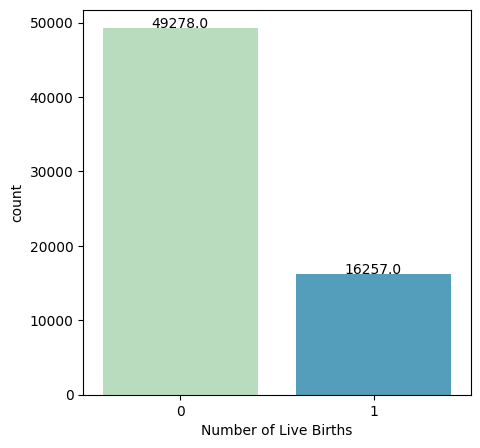

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = df_selected["Number of Live Births"], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Live birth occurrence', round(df_selected["Number of Live Births"].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Live birth occurrence', round(df_selected["Number of Live Births"].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Live birth occurrence 75.19 % of the dataset
Live birth occurrence 24.81 % of the dataset


In [ ]:
df_selected.rename(columns={"Number of Live Births": "Live birth occurrence"}, inplace=True)


In [ ]:
# Delete rows with Patient Age at Treatment = 999
df = df_selected[df_selected["Patient Age at Treatment"] != '999']


In [ ]:
def convert_age_range(age_range):
    if age_range == "18 - 34":
        return 0
    elif age_range ==  "35-37":
        return 1
    elif age_range == "38-39":
        return 2
    elif age_range == "40-42":
        return 3
    elif age_range ==  "43-44":
        return 4
    elif age_range ==  "45-50":
        return 5
    else:
        return None


In [ ]:
# Assume `df` is your DataFrame with the "Age Range" column

# Apply the conversion function to the "Age Range" column
df["Patient Age at Treatment"] = df["Patient Age at Treatment"].apply(convert_age_range).astype('Int64')



In [ ]:
for col in df:
    print(f"{col} has : {df[col].unique()} unique values\n")

Patient Age at Treatment has : <IntegerArray>
[3, 5, 1, 0, 4, 2]
Length: 6, dtype: Int64 unique values

Total Number of Previous IVF cycles has : ['2' '3' '0' '5' '4' '1' '>=5'] unique values

Total number of IVF pregnancies has : ['0' '1' '2' '4' '3' '5' '>=5'] unique values

Total number of live births - conceived through IVF has : [0 1 2 3 5 4] unique values

Type of Infertility - Female Primary has : [0 1] unique values

Type of Infertility - Female Secondary has : [0 1] unique values

Type of Infertility - Male Primary has : [0 1] unique values

Type of Infertility - Male Secondary has : [0 1] unique values

Type of Infertility -Couple Primary has : [0 1] unique values

Type of Infertility -Couple Secondary has : [0 1] unique values

Cause  of Infertility - Tubal disease has : [0 1] unique values

Cause of Infertility - Ovulatory Disorder has : [0 1] unique values

Cause of Infertility - Male Factor has : [0 1] unique values

Cause of Infertility - Patient Unexplained has : [1 0] 

In [ ]:
df.isnull().sum()


Patient Age at Treatment                                       0
Total Number of Previous IVF cycles                            0
Total number of IVF pregnancies                                0
Total number of live births - conceived through IVF            0
Type of Infertility - Female Primary                           0
Type of Infertility - Female Secondary                         0
Type of Infertility - Male Primary                             0
Type of Infertility - Male Secondary                           0
Type of Infertility -Couple Primary                            0
Type of Infertility -Couple Secondary                          0
Cause  of Infertility - Tubal disease                          0
Cause of Infertility - Ovulatory Disorder                      0
Cause of Infertility - Male Factor                             0
Cause of Infertility - Patient Unexplained                     0
Cause of Infertility - Endometriosis                           0
Cause of Infertility - Ce

In [ ]:
# Drop rows with NaN values
df.dropna(inplace=True)




In [ ]:
#X = df.loc[:, df.columns != 'Live birth occurrence']
#X = X.apply(pd.to_numeric, errors='coerce')
#df1=X.fillna(X.median())


In [ ]:
#Y = df['Live birth occurrence']

In [ ]:
#df=pd.concat([df1, Y], axis=1, join='inner')


In [ ]:
df.loc[df['Total Number of Previous IVF cycles'] == '>=5', 'Total Number of Previous IVF cycles'] = 6
df['Total Number of Previous IVF cycles'] = df['Total Number of Previous IVF cycles'].astype(int)


In [ ]:
df.loc[df['Fresh Eggs Collected'] == '> 50', 'Fresh Eggs Collected'] = 60
df['Fresh Eggs Collected'] = df['Fresh Eggs Collected'].astype(int)

In [ ]:
df.loc[df['Eggs Mixed With Partner Sperm'] == '> 50', 'Eggs Mixed With Partner Sperm'] = 60
df['Eggs Mixed With Partner Sperm'] = df['Eggs Mixed With Partner Sperm'].astype(int)

In [ ]:
df.loc[df['Total number of IVF pregnancies'] == '>=5', 'Total number of IVF pregnancies'] = 6
df['Total number of IVF pregnancies'] = df['Total number of IVF pregnancies'].astype(int)


In [ ]:
df=df.drop(['Egg Source','Sperm From','Cause of Infertility -  Partner Sperm Immunological factors','Stimulation used'], axis=1)

In [ ]:
df=df.drop(['Cause of Infertility - Female Factors'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64442 entries, 0 to 65534
Data columns (total 26 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   Patient Age at Treatment                             64442 non-null  Int64
 1   Total Number of Previous IVF cycles                  64442 non-null  int64
 2   Total number of IVF pregnancies                      64442 non-null  int64
 3   Total number of live births - conceived through IVF  64442 non-null  int64
 4   Type of Infertility - Female Primary                 64442 non-null  int64
 5   Type of Infertility - Female Secondary               64442 non-null  int64
 6   Type of Infertility - Male Primary                   64442 non-null  int64
 7   Type of Infertility - Male Secondary                 64442 non-null  int64
 8   Type of Infertility -Couple Primary                  64442 non-null  int64
 9   Type o

In [ ]:
shape = df.shape


In [ ]:
shape

(64442, 26)

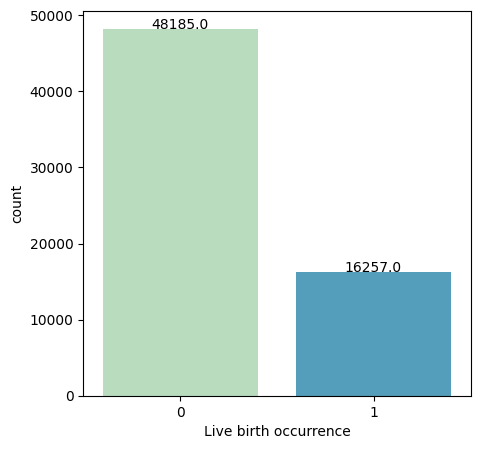

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = df["Live birth occurrence"], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

#Scale Data

In [ ]:
X = df.drop(['Live birth occurrence'], axis=1)


In [ ]:
Y = df['Live birth occurrence']


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the columns from the DataFrame
cols = X.columns

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
scaled_features = scaler.fit_transform(X)

# Create new DataFrames for scaled features
X = pd.DataFrame(scaled_features, columns=cols)


In [ ]:
df=pd.concat([X, Y], axis=1, join='inner')


#Split Data into test and train

In [ ]:
training_features, test_features,training_target, test_target, = train_test_split(X, Y, test_size=0.15,
                                               random_state=12)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .1,
                                                  random_state=12)

#Modeling

#Data Balancing

# oversampling + random forest

In [ ]:
from imblearn.over_sampling import SMOTE
x_train = x_train.astype(int)
y_train = y_train.astype(int)

# Apply SMOTE oversampling
sm = SMOTE(random_state=12, sampling_strategy=1.0)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [ ]:
import numpy as np

# Assuming you have already performed SMOTE oversampling and obtained y_train_res

# Count the occurrences of class 0 and class 1
class_0_count = np.count_nonzero(y_train_res == 0)
class_1_count = np.count_nonzero(y_train_res == 1)

# Print the counts
print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)


Class 0 count: 36825
Class 1 count: 36825


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(n_estimators=25, random_state=12)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_target, clf_rf.predict(test_features)))


              precision    recall  f1-score   support

           0       0.87      0.53      0.66      7237
           1       0.35      0.77      0.48      2430

    accuracy                           0.59      9667
   macro avg       0.61      0.65      0.57      9667
weighted avg       0.74      0.59      0.62      9667



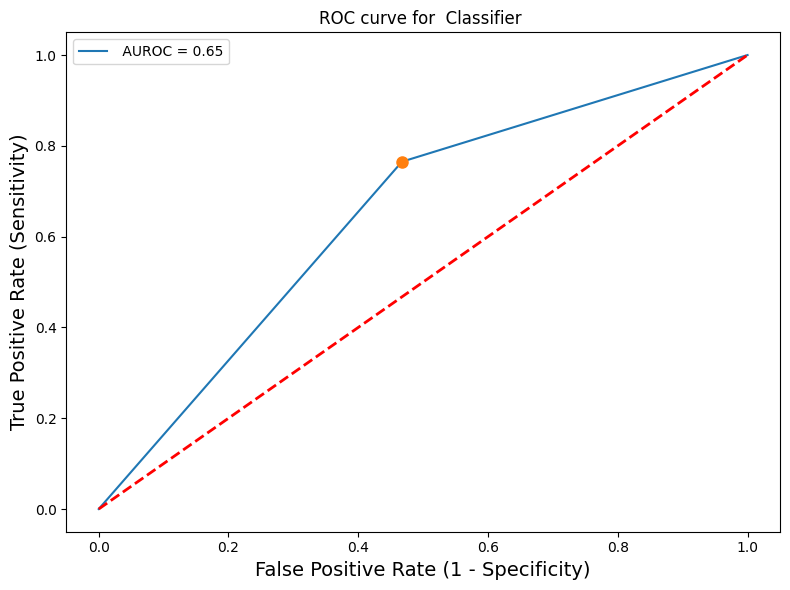

In [ ]:
from sklearn.metrics import roc_curve, auc

fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(test_target, clf_rf.predict(test_features))
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for  Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

#Combine over simpling and under simpling

In [ ]:
from imblearn.combine import SMOTEENN
SEED = 23
x_train = x_train.astype(int)
y_train = y_train.astype(int)
smoteenn  =SMOTEENN(random_state=SEED, n_jobs=-1)
X_res,y_res = smoteenn.fit_resample(x_train,y_train)

In [ ]:
import numpy as np

# Assuming you have already performed SMOTE oversampling and obtained y_train_res

# Count the occurrences of class 0 and class 1
class_0_count = np.count_nonzero(y_res == 0)
class_1_count = np.count_nonzero(y_res == 1)

# Print the counts
print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)


Class 0 count: 14129
Class 1 count: 7623


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(X_res,y_res)

RandomForestClassifier(n_estimators=25, random_state=12)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_target, clf_rf.predict(test_features)))


              precision    recall  f1-score   support

           0       0.83      0.66      0.73      7237
           1       0.37      0.59      0.45      2430

    accuracy                           0.64      9667
   macro avg       0.60      0.62      0.59      9667
weighted avg       0.71      0.64      0.66      9667



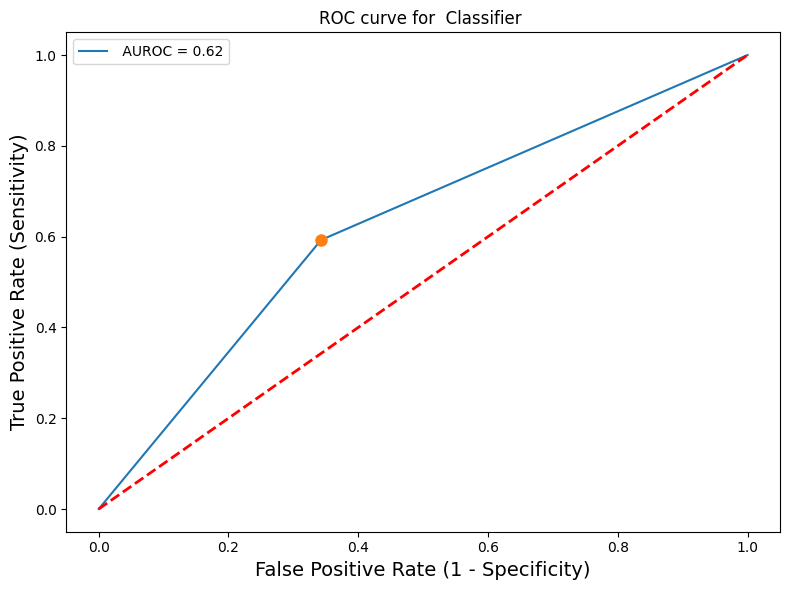

In [ ]:
from sklearn.metrics import roc_curve, auc

fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(test_target, clf_rf.predict(test_features))
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for  Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

#Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
x_train = x_train.astype(int)
y_train = y_train.astype(int)
# Assuming you have separate arrays X and y for your dataset
SEED=23
# Instantiate the RandomUnderSampler
rus = RandomUnderSampler(random_state=SEED)

# Perform random undersampling
X_undersampled, y_undersampled = rus.fit_resample(x_train, y_train)


In [ ]:
import numpy as np

# Assuming you have already performed SMOTE oversampling and obtained y_train_res

# Count the occurrences of class 0 and class 1
class_0_count = np.count_nonzero(y_undersampled == 0)
class_1_count = np.count_nonzero(y_undersampled == 1)

# Print the counts
print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)


Class 0 count: 12472
Class 1 count: 12472


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(X_undersampled, y_undersampled)

RandomForestClassifier(n_estimators=25, random_state=12)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_target, clf_rf.predict(test_features)))


              precision    recall  f1-score   support

           0       0.88      0.50      0.64      7237
           1       0.35      0.80      0.49      2430

    accuracy                           0.58      9667
   macro avg       0.62      0.65      0.57      9667
weighted avg       0.75      0.58      0.60      9667



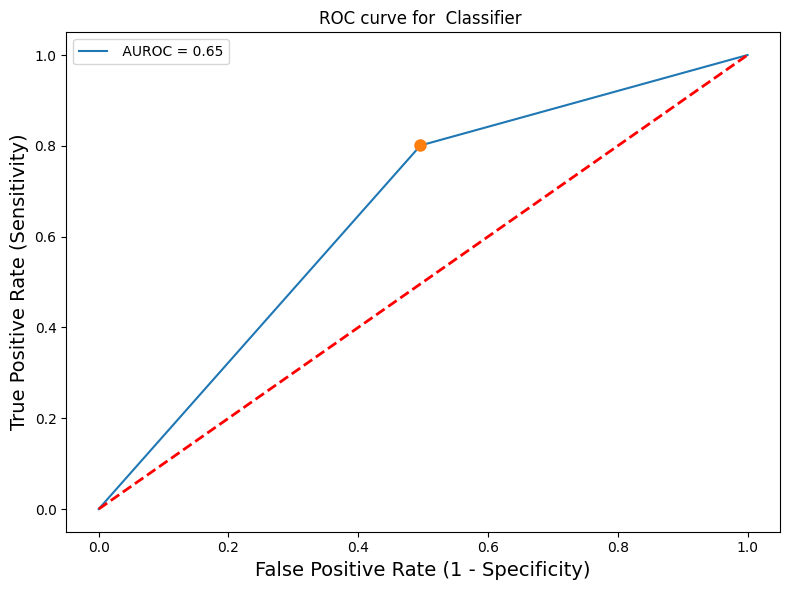

In [ ]:
from sklearn.metrics import roc_curve, auc

fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(test_target, clf_rf.predict(test_features))
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for  Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

#XGBoost Classifer(Using x_train , y_train under sampled)

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_undersampled, y_undersampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_target, xgb_clf.predict(test_features)))


              precision    recall  f1-score   support

           0       0.90      0.49      0.63      7237
           1       0.36      0.84      0.50      2430

    accuracy                           0.58      9667
   macro avg       0.63      0.66      0.57      9667
weighted avg       0.76      0.58      0.60      9667



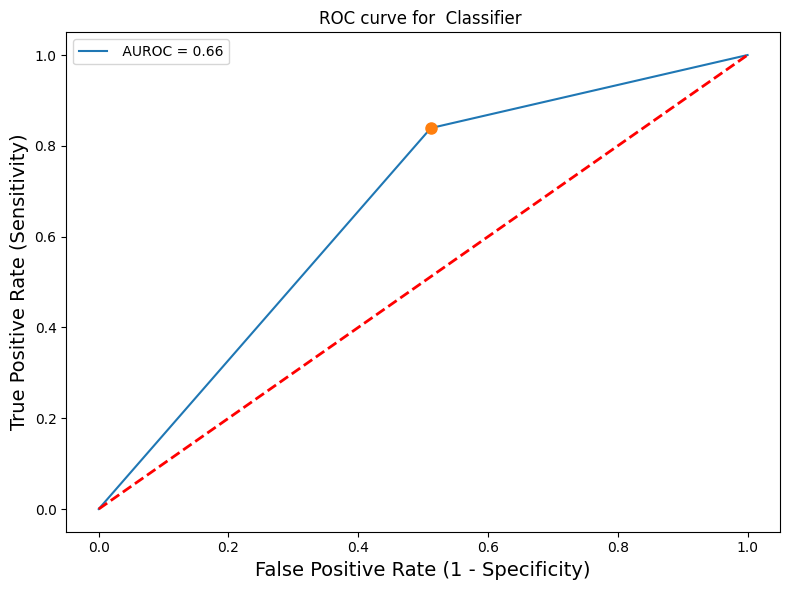

In [ ]:
from sklearn.metrics import roc_curve, auc

fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(test_target, xgb_clf.predict(test_features))
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')



plt.title('ROC curve for  Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_undersampled, y_undersampled)
    train_score.append(accuracy_score(test_target, model.predict(test_features)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 73.40%


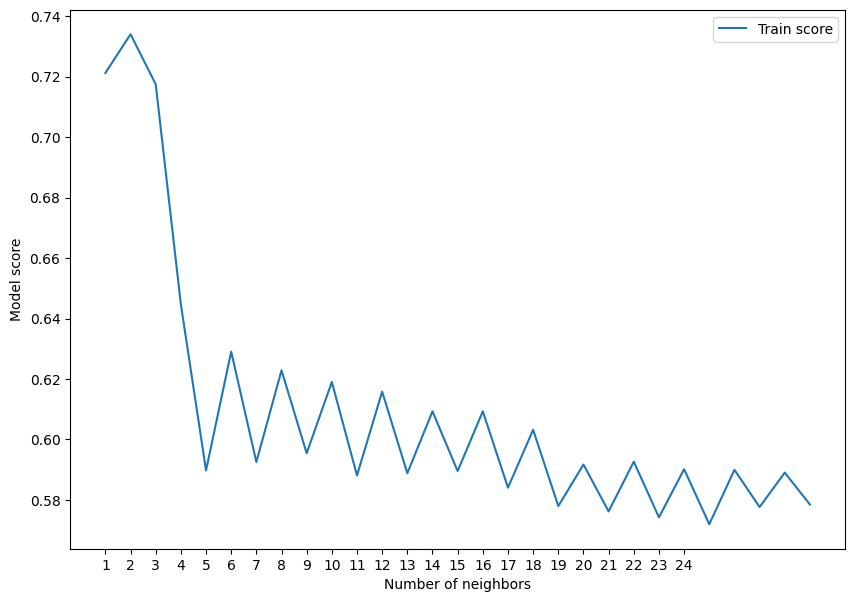

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 25, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=16)


In [ ]:
knn_clf.fit(X_undersampled, y_undersampled)

KNeighborsClassifier(n_neighbors=16)

In [ ]:
print(classification_report(test_target, knn_clf.predict(test_features)))


              precision    recall  f1-score   support

           0       0.85      0.58      0.69      7237
           1       0.36      0.70      0.47      2430

    accuracy                           0.61      9667
   macro avg       0.60      0.64      0.58      9667
weighted avg       0.73      0.61      0.64      9667



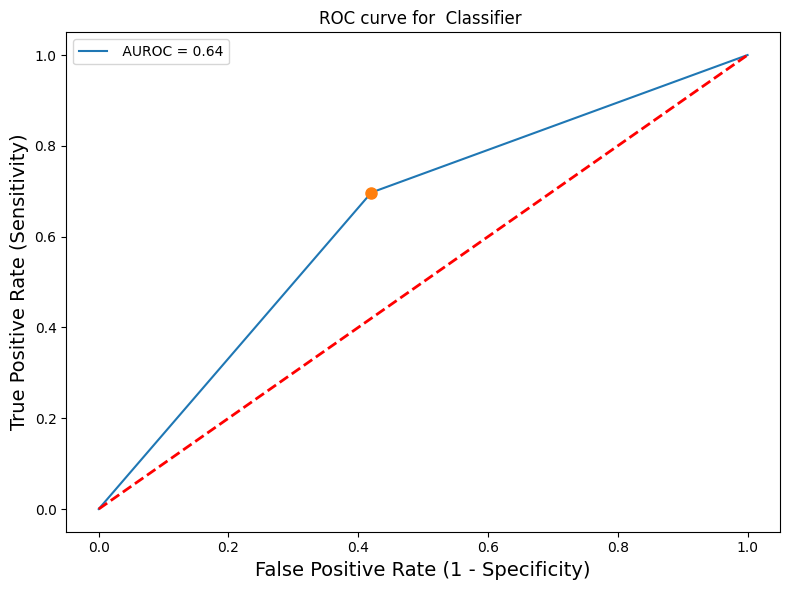

In [ ]:
from sklearn.metrics import roc_curve, auc

fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(test_target, knn_clf.predict(test_features))
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for  Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

#SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_undersampled, y_undersampled)

SVC(gamma=0.1)

In [ ]:
print(classification_report(test_target, svm_clf.predict(test_features)))


              precision    recall  f1-score   support

           0       0.89      0.54      0.67      7237
           1       0.37      0.79      0.50      2430

    accuracy                           0.61      9667
   macro avg       0.63      0.67      0.59      9667
weighted avg       0.76      0.61      0.63      9667



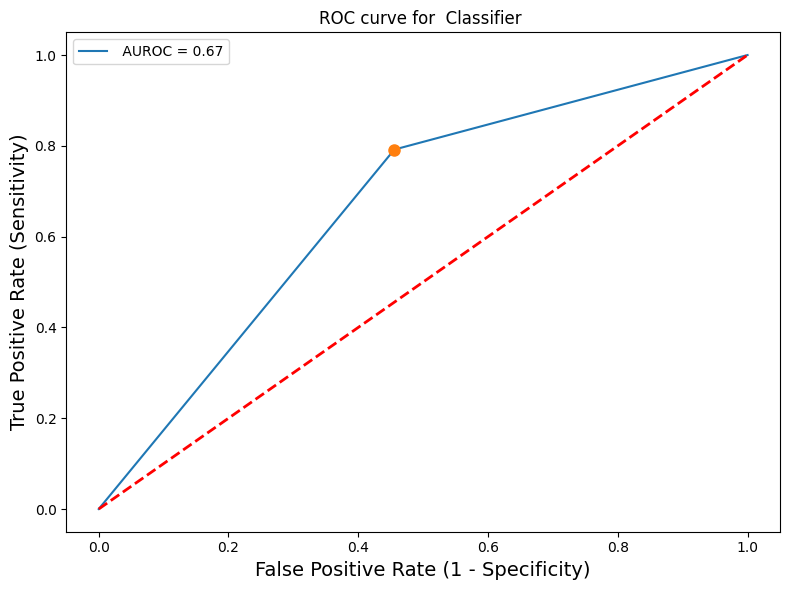

In [ ]:
from sklearn.metrics import roc_curve, auc

fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(test_target, svm_clf.predict(test_features))
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for  Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

#Feature Importance

In [ ]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

<Axes: >

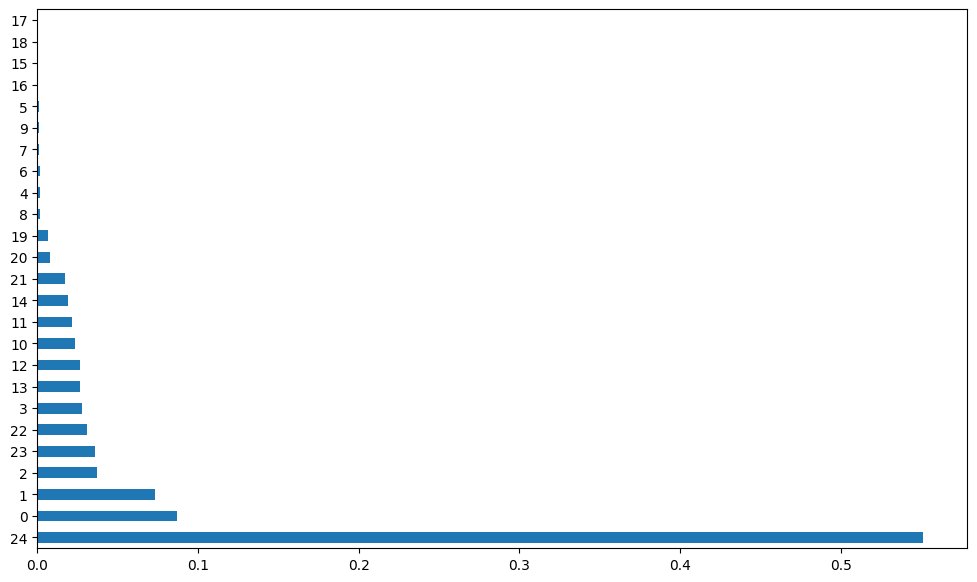

In [ ]:
feature_imp(X,clf_rf).plot(kind='barh', figsize=(12,7), legend=False)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64442 entries, 0 to 64441
Data columns (total 25 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Patient Age at Treatment                             64442 non-null  float64
 1   Total Number of Previous IVF cycles                  64442 non-null  float64
 2   Total number of IVF pregnancies                      64442 non-null  float64
 3   Total number of live births - conceived through IVF  64442 non-null  float64
 4   Type of Infertility - Female Primary                 64442 non-null  float64
 5   Type of Infertility - Female Secondary               64442 non-null  float64
 6   Type of Infertility - Male Primary                   64442 non-null  float64
 7   Type of Infertility - Male Secondary                 64442 non-null  float64
 8   Type of Infertility -Couple Primary                  64442 non-nul